In [1]:
# 2 linear_model.LogisticRegression

In [2]:
'''class sklearn.linear_model.LogisticRegression (penalty=’l2’, dual=False, tol=0.0001, C=1.0,
fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver=’warn’, max_iter=100,
multi_class=’warn’, verbose=0, warm_start=False, n_jobs=None)'''

'class sklearn.linear_model.LogisticRegression (penalty=’l2’, dual=False, tol=0.0001, C=1.0,\nfit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver=’warn’, max_iter=100,\nmulti_class=’warn’, verbose=0, warm_start=False, n_jobs=None)'

In [3]:
# 2.2 重要参数penalty & C

In [4]:
# 2.2.1 正则化

In [5]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
data = load_breast_cancer()
X = data.data
y = data.target

In [7]:
data.data.shape

(569, 30)

In [8]:
lrl1 = LR(penalty="l1",solver="liblinear",C=0.5,max_iter=1000)

In [9]:
lrl2 = LR(penalty="l2",solver="liblinear",C=0.5,max_iter=1000) 

In [10]:
#逻辑回归的重要属性coef_，查看每个特征所对应的参数
lrl1 = lrl1.fit(X,y)

In [11]:
lrl1.coef_

array([[ 3.98976385,  0.03145534, -0.1356219 , -0.0162017 ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.50281583,  0.        , -0.07122687,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.24527112, -0.12840679, -0.01442949,  0.        ,
         0.        , -2.05300169,  0.        ,  0.        ,  0.        ]])

In [12]:
(lrl1.coef_ != 0).sum(axis=1)#不为0的特征个数

array([10])

In [13]:
lrl2 = lrl2.fit(X,y)
lrl2.coef_

array([[ 1.61520485e+00,  1.03164959e-01,  4.89949190e-02,
        -4.54506031e-03, -9.48008791e-02, -3.01421091e-01,
        -4.56860007e-01, -2.23258689e-01, -1.36553831e-01,
        -1.93906484e-02,  1.51862999e-02,  8.84898972e-01,
         1.16165127e-01, -9.44762688e-02, -9.89656328e-03,
        -2.29725481e-02, -5.65957760e-02, -2.71051009e-02,
        -2.78528078e-02,  3.23046051e-04,  1.25588855e+00,
        -3.02228727e-01, -1.72470478e-01, -2.21057115e-02,
        -1.74443797e-01, -8.78235965e-01, -1.16396037e+00,
        -4.29422513e-01, -4.23200620e-01, -8.69294155e-02]])

In [14]:
(lrl2.coef_ != 0).sum(axis=1)#不为0的特征个数

array([30])

In [15]:
np.linspace(0.05,1,19)#以0.05为起始1为结束终点，随机生成19个数

array([0.05      , 0.10277778, 0.15555556, 0.20833333, 0.26111111,
       0.31388889, 0.36666667, 0.41944444, 0.47222222, 0.525     ,
       0.57777778, 0.63055556, 0.68333333, 0.73611111, 0.78888889,
       0.84166667, 0.89444444, 0.94722222, 1.        ])

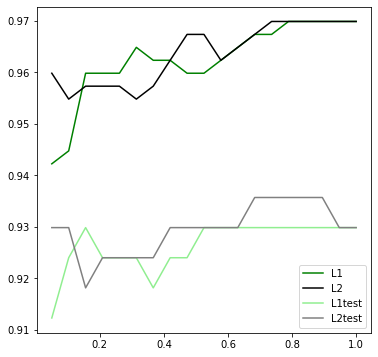

In [16]:
l1 = []
l2 = []
l1test = []
l2test = []
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)

for i in np.linspace(0.05,1,19):
    lrl1 = LR(penalty="l1",solver="liblinear",C=i,max_iter=1000)
    lrl2 = LR(penalty="l2",solver="liblinear",C=i,max_iter=1000)

    lrl1 = lrl1.fit(Xtrain,Ytrain)
    l1.append(accuracy_score(lrl1.predict(Xtrain),Ytrain))
    l1test.append(accuracy_score(lrl1.predict(Xtest),Ytest))
    lrl2 = lrl2.fit(Xtrain,Ytrain)
    l2.append(accuracy_score(lrl2.predict(Xtrain),Ytrain))
    l2test.append(accuracy_score(lrl2.predict(Xtest),Ytest))
graph = [l1,l2,l1test,l2test]
color = ["green","black","lightgreen","gray"]
label = ["L1","L2","L1test","L2test"]
plt.figure(figsize=(6,6))
for i in range(len(graph)):
    plt.plot(np.linspace(0.05,1,19),graph[i],color[i],label=label[i])
plt.legend(loc=4) #图例的位置在哪里?4表示，右下角
plt.show()

In [17]:
#2.2.2 逻辑回归中的特征工程

In [18]:
#embedded高效的嵌入法

In [19]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel

data = load_breast_cancer()
data.data.shape

(569, 30)

In [20]:
LR_ = LR(solver="liblinear",C=0.9,random_state=420)
cross_val_score(LR_,data.data,data.target,cv=10).mean()

0.9508145363408522

In [21]:
X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)
X_embedded.shape
cross_val_score(LR_,X_embedded,data.target,cv=10).mean()

0.9368107769423559

In [22]:
# 1. 调节SelectFromModel这个类中的参数threshold，这是嵌入法的阈值，表示删除所有参数的绝对值低于这个阈
# 值的特征。现在threshold默认为None，所以SelectFromModel只根据L1正则化的结果来选择了特征，即选择了所
# 有L1正则化后参数不为0的特征。

In [23]:
LR_.fit(data.data,data.target).coef_

array([[ 2.01994862e+00,  1.15551959e-01, -4.37792535e-02,
        -3.46687191e-03, -1.44272606e-01, -3.86034923e-01,
        -6.13359921e-01, -3.20928101e-01, -2.10809114e-01,
        -2.48192681e-02, -1.63463225e-02,  1.19541387e+00,
         3.22021711e-02, -9.53579147e-02, -1.57101820e-02,
        -1.79584072e-04, -4.91641357e-02, -3.79125915e-02,
        -3.97606617e-02,  5.36143162e-03,  1.25284987e+00,
        -3.36799195e-01, -1.31521053e-01, -2.37985507e-02,
        -2.67141291e-01, -1.10012028e+00, -1.51840519e+00,
        -6.18230960e-01, -6.48009541e-01, -1.10359345e-01]])

In [24]:
abs((LR_.fit(data.data,data.target).coef_)).max() #选择其中绝对值最大的

2.0199486150823716

In [25]:
fullx = []
fsx = []
threshold = np.linspace(0,abs((LR_.fit(data.data,data.target).coef_)).max(),20) 
threshold

array([0.        , 0.10631309, 0.21262617, 0.31893926, 0.42525234,
       0.53156543, 0.63787851, 0.7441916 , 0.85050468, 0.95681777,
       1.06313085, 1.16944394, 1.27575702, 1.38207011, 1.48838319,
       1.59469628, 1.70100936, 1.80732245, 1.91363553, 2.01994862])

(0.0, 30)
(0.10631308500433534, 17)
(0.21262617000867068, 12)
(0.318939255013006, 11)
(0.42525234001734136, 8)
(0.5315654250216767, 8)
(0.637878510026012, 6)
(0.7441915950303474, 5)
(0.8505046800346827, 5)
(0.956817765039018, 5)
(1.0631308500433534, 5)
(1.1694439350476888, 4)
(1.275757020052024, 2)
(1.3820701050563593, 2)
(1.4883831900606947, 2)
(1.5946962750650302, 1)
(1.7010093600693654, 1)
(1.8073224450737007, 1)
(1.913635530078036, 1)
(2.0199486150823716, 1)


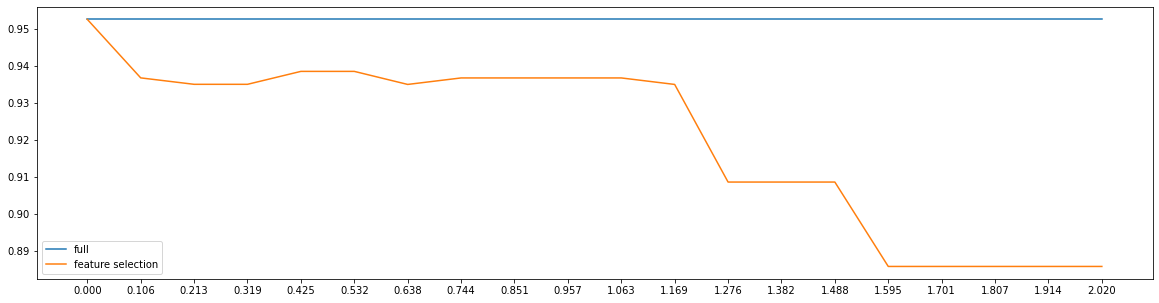

In [26]:
k=0
for i in threshold:
    X_embedded = SelectFromModel(LR_,threshold=i).fit_transform(data.data,data.target)
    fullx.append(cross_val_score(LR_,data.data,data.target,cv=5).mean())
    fsx.append(cross_val_score(LR_,X_embedded,data.target,cv=5).mean())
    print((threshold[k],X_embedded.shape[1]))
    k+=1
    
plt.figure(figsize=(20,5))
plt.plot(threshold,fullx,label="full")
plt.plot(threshold,fsx,label="feature selection")
plt.xticks(threshold)
plt.legend()
plt.show()

In [27]:
# 2.第二种调整方法，是调逻辑回归的类LR_，通过画C的学习曲线来实现

In [28]:
fullx = []
fsx = []
C=np.arange(0.01,10.01,0.5)

In [29]:
C

array([0.01, 0.51, 1.01, 1.51, 2.01, 2.51, 3.01, 3.51, 4.01, 4.51, 5.01,
       5.51, 6.01, 6.51, 7.01, 7.51, 8.01, 8.51, 9.01, 9.51])

0.9543546365914788 4.01


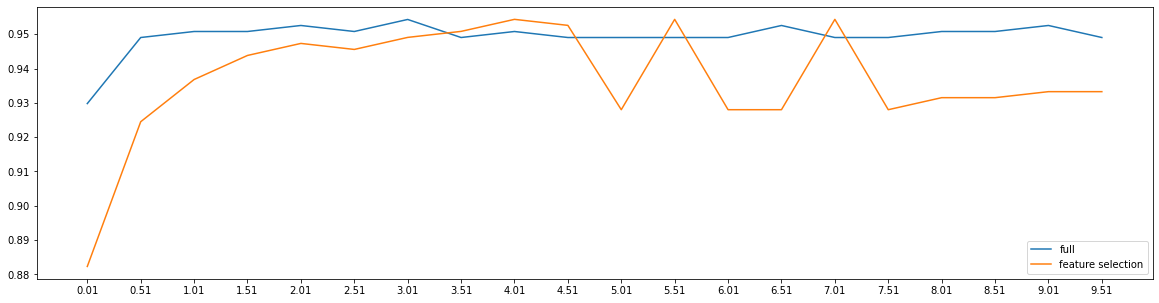

In [30]:
for i in C:
    LR_ = LR(solver="liblinear",C=i,random_state=420)
    fullx.append(cross_val_score(LR_,data.data,data.target,cv=10).mean())
    
    X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)
    fsx.append(cross_val_score(LR_,X_embedded,data.target,cv=10).mean())
    
print(max(fsx),C[fsx.index(max(fsx))])

plt.figure(figsize=(20,5))
plt.plot(C,fullx,label="full")
plt.plot(C,fsx,label="feature selection")
plt.xticks(C)
plt.legend()
plt.show()

In [ ]:
#细化学习曲线
fullx = []
fsx = []
C=np.arange(6.05,7.05,0.005)
for i in C:
    LR_ = LR(solver="liblinear",C=i,random_state=420)

    fullx.append(cross_val_score(LR_,data.data,data.target,cv=10).mean())

    X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)
    fsx.append(cross_val_score(LR_,X_embedded,data.target,cv=10).mean())

print(max(fsx),C[fsx.index(max(fsx))])
plt.figure(figsize=(20,5))
plt.plot(C,fullx,label="full")
plt.plot(C,fsx,label="feature selection")
plt.xticks(C)
plt.legend()
plt.show()

In [ ]:
#验证模型效果：降维之前
LR_ = LR(solver="liblinear",C=6.069999999999999,random_state=420)
cross_val_score(LR_,data.data,data.target,cv=10).mean()

In [ ]:
#验证模型效果：降维之后
LR_ = LR(solver="liblinear",C=6.069999999999999,random_state=420)
X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)
cross_val_score(LR_,X_embedded,data.target,cv=10).mean()

In [ ]:
X_embedded.shape

In [ ]:
# max_iter越大，代表步长越小，模型迭代时间越长，反之，则代表步长设置很大，模型迭代时间很短。max_iter的学习曲线

In [ ]:
l2 = []
l2test = []
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)
for i in np.arange(1,201,10):
    lrl2 = LR(penalty="l2",solver="liblinear",C=0.9,max_iter=i)
    lrl2 = lrl2.fit(Xtrain,Ytrain)
    l2.append(accuracy_score(lrl2.predict(Xtrain),Ytrain))
    l2test.append(accuracy_score(lrl2.predict(Xtest),Ytest))

graph = [l2,l2test]
color = ["black","gray"]
label = ["L2","L2test"]

plt.figure(figsize=(20,5))
for i in range(len(graph)):
    plt.plot(np.arange(1,201,10),graph[i],color[i],label=label[i])
plt.legend(loc=4)
plt.xticks(np.arange(1,201,10))
plt.show()

In [ ]:
#我们可以使用属性.n_iter_来调用本次求解中真正实现的迭代次数
lr = LR(penalty="l2",solver="liblinear",C=0.9,max_iter=300).fit(Xtrain,Ytrain)
lr.n_iter_

In [ ]:
# 2.4 二元回归与多元回归：重要参数solver & multi_class

In [ ]:
#使用参数multi_class来告诉模型，我们的预测标签是什么样的类型。
'''multi_class
输入"ovr", "multinomial", "auto"来告知模型，我们要处理的分类问题的类型。默认是"ovr"。
'ovr':表示分类问题是二分类，或让模型使用"一对多"的形式来处理多分类问题。
'multinomial'：表示处理多分类问题，这种输入在参数solver是'liblinear'时不可用。
"auto"：表示会根据数据的分类情况和其他参数来确定模型要处理的分类问题的类型。比如说，如果数据是二分
类，或者solver的取值为"liblinear"，"auto"会默认选择"ovr"。反之，则会选择"nultinomial"。'''

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
iris.target

In [ ]:
for multi_class in ('multinomial', 'ovr'):
    clf = LR(solver='sag', max_iter=100, random_state=42,
                            multi_class=multi_class).fit(iris.data, iris.target) #打印两种multi_class模式下的训练分数
    #%的用法，用%来代替打印的字符串中，想由变量替换的部分。%.3f表示，保留三位小数的浮点数。%s表示，字符串。
    #字符串后的%后使用元祖来容纳变量，字符串中有几个%，元祖中就需要有几个变量
    print("training score : %.3f (%s)" % (clf.score(iris.data, iris.target), multi_class))

In [ ]:
# 2.5 样本不平衡与参数class_weight

In [ ]:
'''参数class_weight对样本标签进行一定的均衡，给少量的标签更多的权重，让模型更偏向少数类，
向捕获少数类的方向建模。该参数默认None，此模式表示自动给与数据集中的所有标签相同的权重，即自动1：'''